In [1]:
# import packages
# numpy, pandas, scipy, math, matplotlib

In [2]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [3]:
# import estimators

In [4]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [5]:
# import model metrics

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [7]:
# import cross-validation tools

In [8]:
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# import data

In [10]:
rawData = pd.read_csv('credit_default_data.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PRED
0,46,210000,1,1,2,29,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
1,80,240000,2,2,2,44,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
2,122,450000,1,1,1,40,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
3,141,240000,1,1,2,47,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,174,50000,2,1,2,24,1,-2,-2,-2,...,-2898,-3272,-3272,0,0,0,0,0,0,1


In [11]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID              30000 non-null int64
LIMIT_BAL       30000 non-null int64
SEX             30000 non-null int64
EDUCATION       30000 non-null int64
MARRIAGE        30000 non-null int64
AGE             30000 non-null int64
PAY_0           30000 non-null int64
PAY_2           30000 non-null int64
PAY_3           30000 non-null int64
PAY_4           30000 non-null int64
PAY_5           30000 non-null int64
PAY_6           30000 non-null int64
BILL_AMT1       30000 non-null int64
BILL_AMT2       30000 non-null int64
BILL_AMT3       30000 non-null int64
BILL_AMT4       30000 non-null int64
BILL_AMT5       30000 non-null int64
BILL_AMT6       30000 non-null int64
PAY_AMT1        30000 non-null int64
PAY_AMT2        30000 non-null int64
PAY_AMT3        30000 non-null int64
PAY_AMT4        30000 non-null int64
PAY_AMT5        30000 non-null int64
PAY_AMT6        30000 non-null int64
DEF

In [18]:
variableName = rawData.iloc[:,5]

In [22]:
variableName = rawData['AGE']

In [23]:
variableName = rawData.iloc[:,0:5]

In [24]:
# select features

In [25]:
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,-709,-709,-709,-2898,-3272,-3272,0,0,0,0,0


In [26]:
# select dependent variable

In [27]:
depVar = rawData['PAY_AMT6']

In [29]:
# create Training Set for X variables

In [30]:
X_train = (features[: 1000])
X_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,-709,-709,-709,-2898,-3272,-3272,0,0,0,0,0


In [31]:
# create Training Set for Y variable

In [32]:
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    0
1    0
2    0
3    0
4    0
Name: PAY_AMT6, dtype: int64

In [33]:
# create Testing Set for X variables

In [34]:
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900       1692      13250        433       1831          0       2891   
29901     204157     211065     206043     181945      52712       3574   
29902      12939      28805      41027      36073      46096     103065   
29903        760        380        760        380        380          0   
29904     393159      44917      52366      29995      22722      24479   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900     13250       433      1831         0      2891  
29901     10059     10120      8256      5000      4036  
29902     28954     41027     36073     46096    103065  
29903         0       760         0       380         0  
29904      2522     17213      1000      1000      2100  


In [35]:
# establish Ground Truth

In [36]:
y_test = depVar[:-100]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 29900


0    0
1    0
2    0
3    0
4    0
Name: PAY_AMT6, dtype: int64

In [37]:
# Cross Validation

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 11), (188, 11))

In [41]:
# Getting to the actual exercise...

In [42]:
# Models we'll use

In [43]:
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [44]:
# Review of features we'll be using

In [45]:
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,-709,-709,-709,-2898,-3272,-3272,0,0,0,0,0


In [46]:
# Check dependent variable

In [47]:
print(depVar)

0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
          ...  
29970    211192
29971    213405
29972    216338
29973    219844
29974    220000
29975    220076
29976    220371
29977    222429
29978    223833
29979    228300
29980    232972
29981    239400
29982    250005
29983    250400
29984    260000
29985    261883
29986    278311
29987    279260
29988    279706
29989    280000
29990    290000
29991    308000
29992    351282
29993    372495
29994    377000
29995    403500
29996    422000
29997    443001
29998    527143
29999    528666
Name: PAY_AMT6, Length: 

In [48]:
# Fit the data to the models

In [49]:
# Random Forest
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
# SVR
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [52]:
# Linear Regression
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
# Check the training Score for each

In [54]:
# Random Forest
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[1. 1. 1.]


1.0

In [56]:
# SVR
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[1. 1. 1.]


1.0

In [57]:
# Linear Regression
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[1. 1. 1.]


1.0

In [58]:
# Make Predictions
# Choose model
# We'll do Random Forest 
# I know I'm interested in this one later for the classification problem

In [59]:
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 1.000
RMSE: 0.000


In [60]:
# Plot the results
# Using Scatterplot

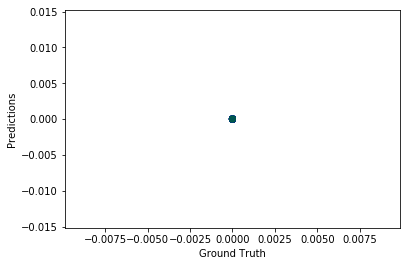

In [61]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [ ]:
#HA! Single dot. About what I expected. Lovely. 